In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os

## Feature Selection
from sklearn.preprocessing import LabelEncoder

In [4]:
File_Path = os.path.join(os.getcwd(), 'data_cleaning_heart_disease_uci.csv')
df = pd.read_csv(File_Path)
df.head()

,age,gender,dataset,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [6]:
df["age_cholesterol_ratio"] = df["age"] / (df["cholesterol"] + 1)

In [8]:
df["bp_cholesterol_ratio"] = df["resting_blood_pressure"] / (df["cholesterol"] + 1)

In [10]:
df["heart_rate_stress"] = df["maximum_heart_rate_achieved"] / (df["age"] + 1)

In [12]:
df["risk_index"] = df["resting_blood_pressure"] + df["cholesterol"] - df["maximum_heart_rate_achieved"]

In [14]:
le = LabelEncoder()

In [16]:
# Categorical columns to encode
categorical_cols = [
    "gender", 
    "dataset", 
    "chest_pain_type", 
    "fasting_blood_sugar", 
    "resting_electrocardiographic_results", 
    "exercise_induced_angina"
]

In [18]:
# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
num_col = df.select_dtypes(include = 'number').columns.drop('num')
cat_col = df.select_dtypes(exclude = 'number')

In [22]:
corr_matrix = df[num_col.tolist() + ['num']].corr()
corr_target = corr_matrix['num'].sort_values(ascending=False)

print("Correlation of numerical features with target:")
print(corr_target)

Correlation of numerical features with target:
num                                     1.000000
exercise_induced_angina                 0.432424
oldpeak                                 0.389616
gender                                  0.305445
dataset                                 0.294643
age                                     0.282039
risk_index                              0.227552
age_cholesterol_ratio                   0.138546
resting_blood_pressure                  0.110818
fasting_blood_sugar                     0.108114
resting_electrocardiographic_results    0.057384
cholesterol                             0.052224
bp_cholesterol_ratio                   -0.008906
maximum_heart_rate_achieved            -0.381817
chest_pain_type                        -0.386828
heart_rate_stress                      -0.392727
Name: num, dtype: float64


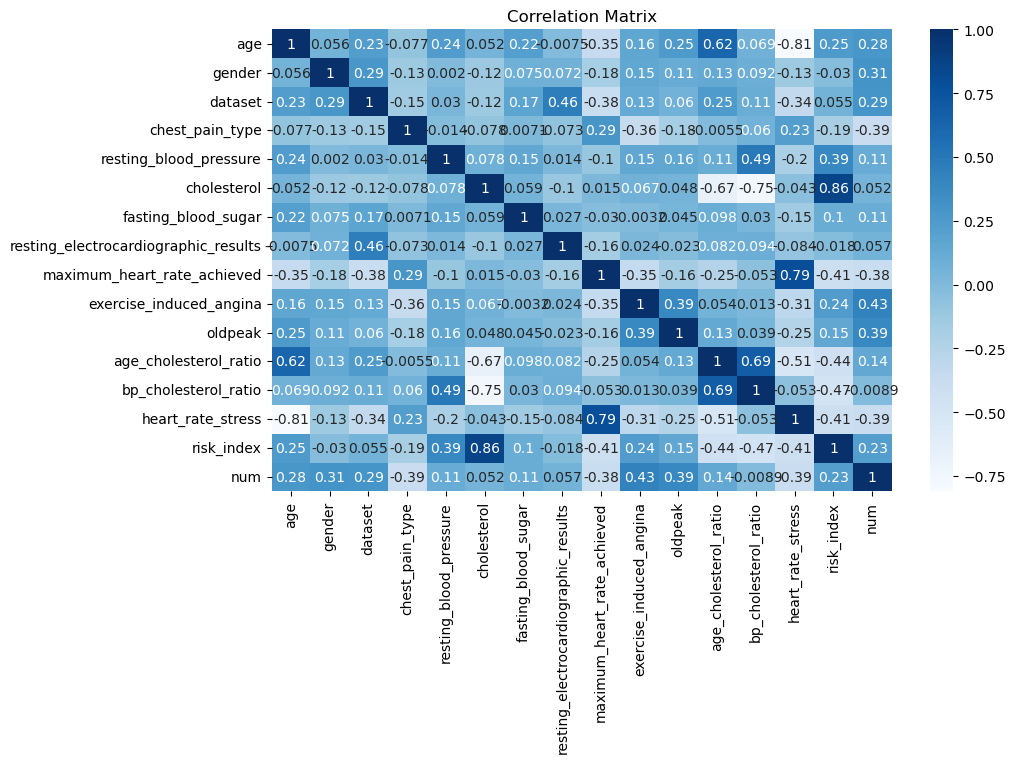

In [24]:
corr_matrix = df[num_col.tolist() + ['num']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [26]:
top_features = corr_target[abs(corr_target) > 0.1].index.drop('num')
print("Selected top features:", top_features.tolist())

Selected top features: ['exercise_induced_angina', 'oldpeak', 'gender', 'dataset', 'age', 'risk_index', 'age_cholesterol_ratio', 'resting_blood_pressure', 'fasting_blood_sugar', 'maximum_heart_rate_achieved', 'chest_pain_type', 'heart_rate_stress']


In [28]:
set(df.columns) - set(top_features)

{'bp_cholesterol_ratio',
 'cholesterol',
 'num',
 'resting_electrocardiographic_results'}

In [46]:
df.drop(columns = ['cholesterol', 'resting_electrocardiographic_results'], inplace = True)

In [50]:
# Save the cleaned dataset to a CSV file
df.to_csv('heart_disease_uci_encoding.csv', index=False)